# Regression

# Boston Housing Price Prediction


In [87]:
import numpy as np
import pandas as pd
import sklearn

In [88]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.26.0
2.1.1
3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
1.3.1


In [89]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

--2023-09-23 20:49:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘housing.data.1’

housing.data.1          [  <=>               ]  47.93K   157KB/s    in 0.3s    

2023-09-23 20:49:33 (157 KB/s) - ‘housing.data.1’ saved [49082]

--2023-09-23 20:49:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘housing.names.1’

housing.names.1         [ <=>                ]   2.03K  --.-KB/s    in 0s      

2023-09-23 20:49:35 (311 MB/s) - ‘housing.names.1’ 

In [90]:
!ls

'Copy of Data Mining Pre-processing.ipynb'
 datacleaning.ipynb
 diabetes.csv
 housing.data
 housing.data.1
 housing.names
 housing.names.1
'Regression_Model_(Boston_Housing_Price_Prediction).ipynb'


In [91]:
!cat housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [92]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)

In [93]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. |
|**INDUS**  | proportion of non-retail business acres per town |
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
|**NOX**  | nitric oxides concentration (parts per 10 million) |
|**RM**  | average number of rooms per dwelling |
|**AGE**  | proportion of owner-occupied units built prior to 1940 |
|**DIS**  | weighted distances to five Boston employment centres |
|**RAD**  | index of accessibility to radial highways |
|**TAX**  | full-value property-tax rate per $10,000 |
|**PTRATIO**  | pupil-teacher ratio by town |
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
|**LSTAT**  | % lower status of the population |
|**MEDV**  | Median value of owner-occupied homes in \$1000's |

In [94]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [95]:
df.columns = col_name

In [96]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


# Exploratory Data Anaysis (EDA)

In [97]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.12.2


In [99]:
import warnings
warnings.filterwarnings('ignore')

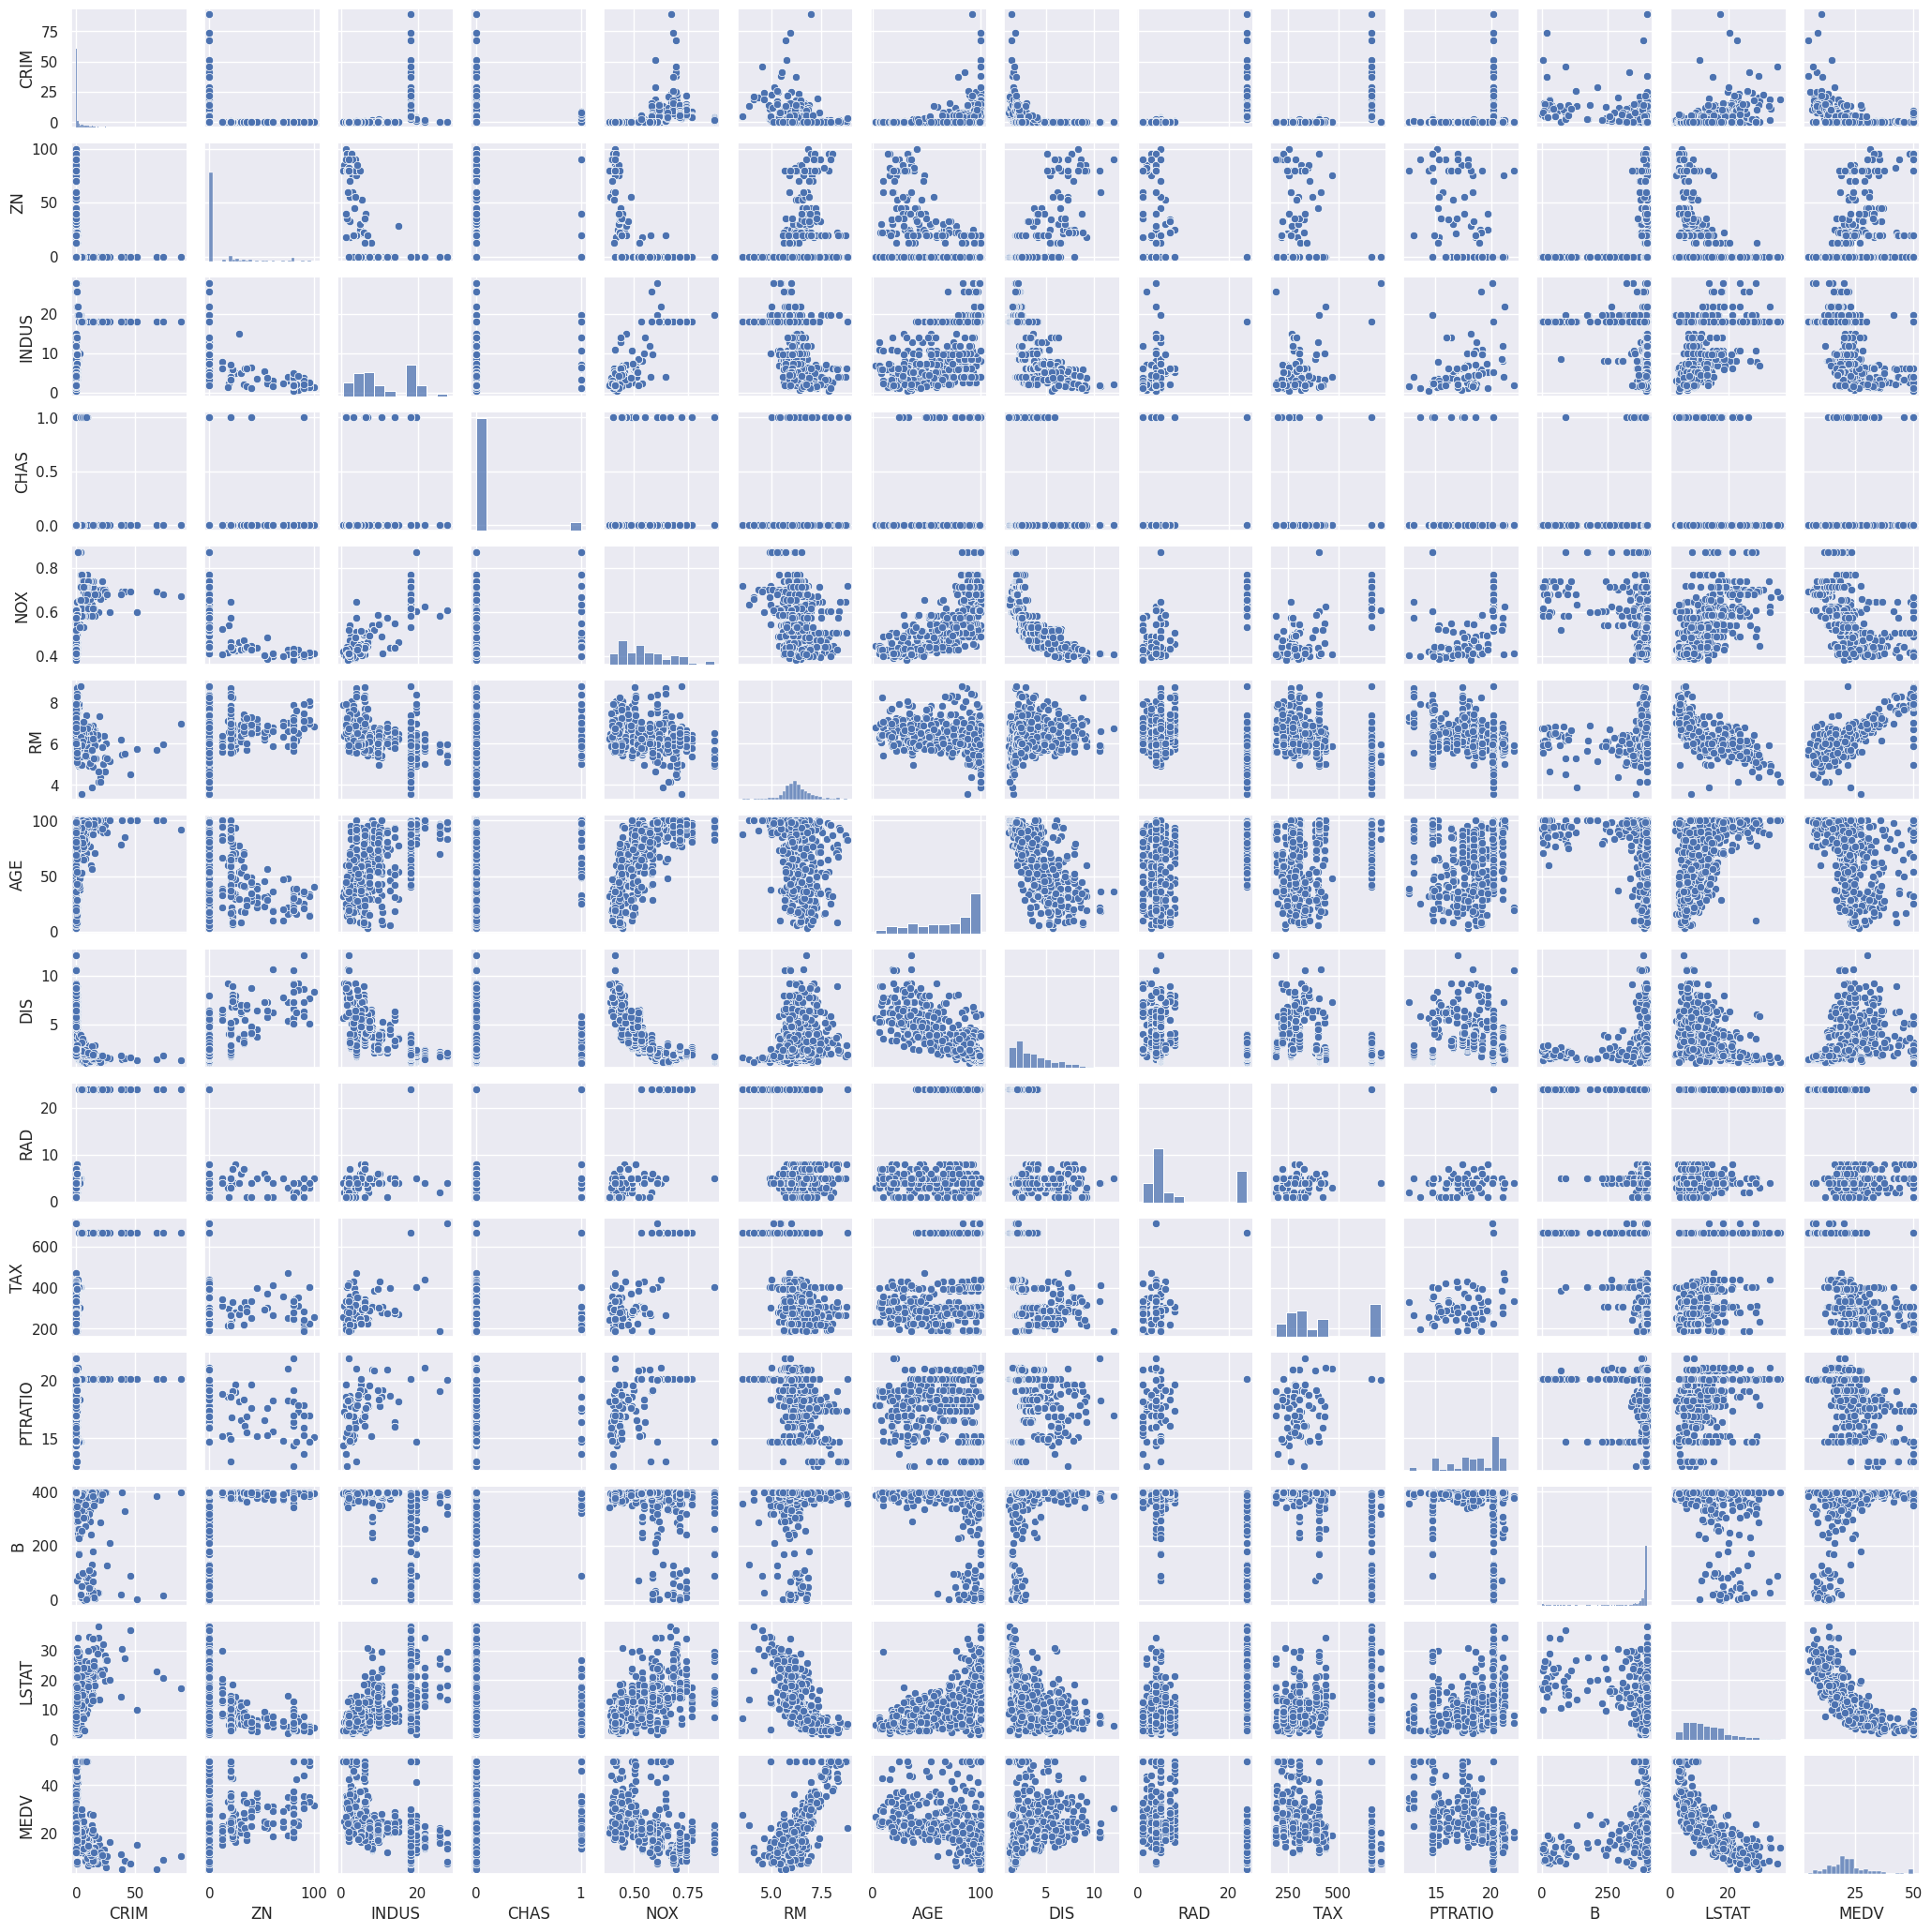

In [100]:
sns.pairplot(df, height=1.5);
plt.show()

In [101]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

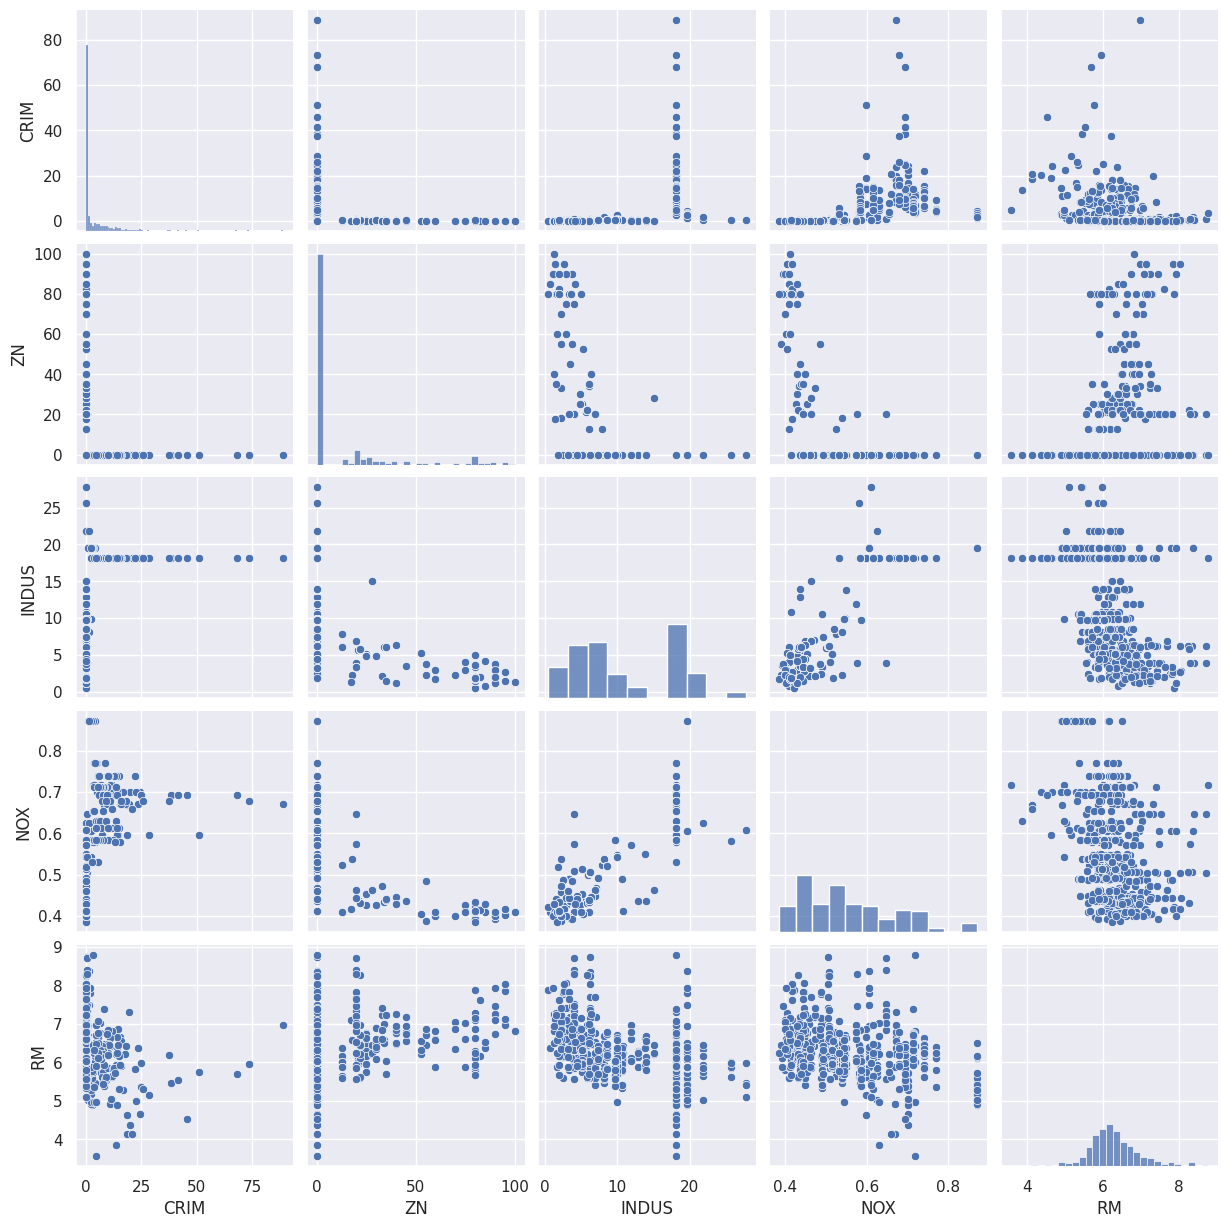

In [102]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. |
|**INDUS**  | proportion of non-retail business acres per town |
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
|**NOX**  | nitric oxides concentration (parts per 10 million) |
|**RM**  | average number of rooms per dwelling |
|**AGE**  | proportion of owner-occupied units built prior to 1940 |
|**DIS**  | weighted distances to five Boston employment centres |
|**RAD**  | index of accessibility to radial highways |
|**TAX**  | full-value property-tax rate per $10,000 |
|**PTRATIO**  | pupil-teacher ratio by town |
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
|**LSTAT**  | % lower status of the population |
|**MEDV**  | Median value of owner-occupied homes in \$1000's |

In [103]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

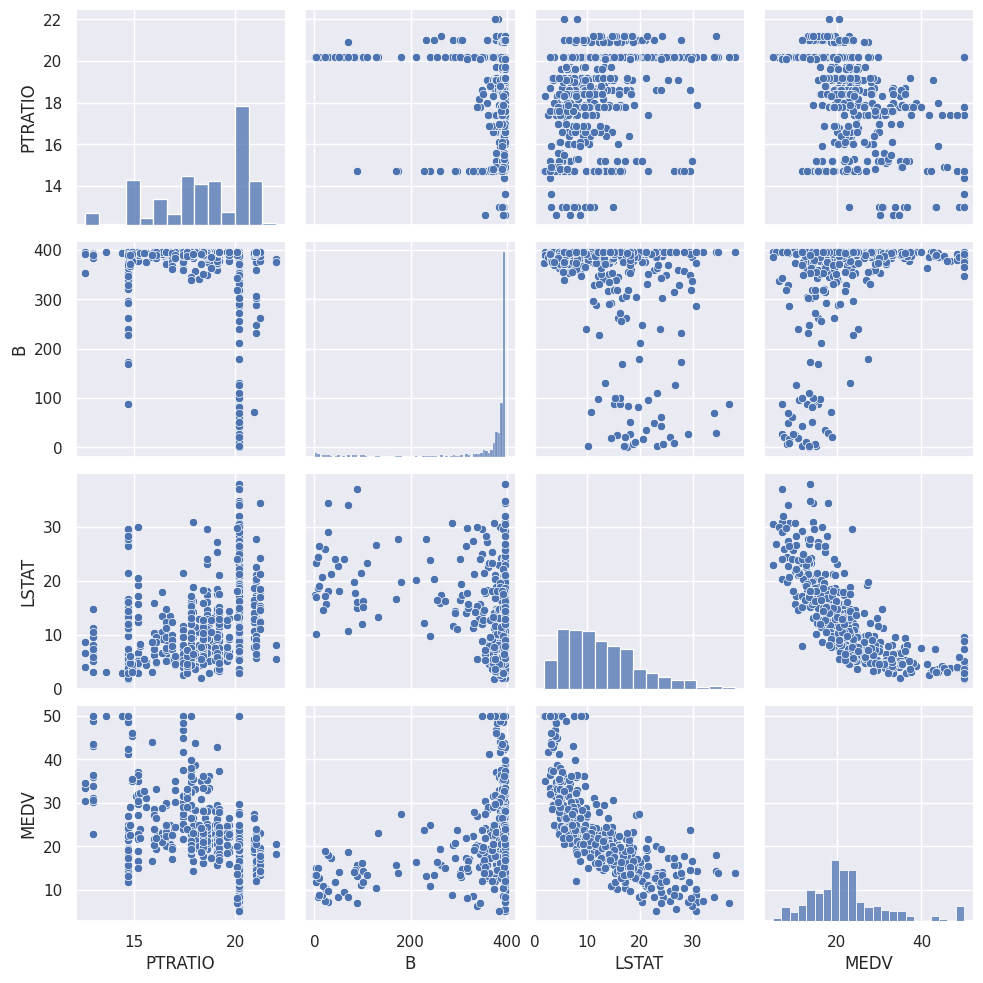

In [104]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

***

# Correlation Analysis and Feature Selection

In [105]:
pd.options.display.float_format = '{:,.2f}'.format

In [106]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


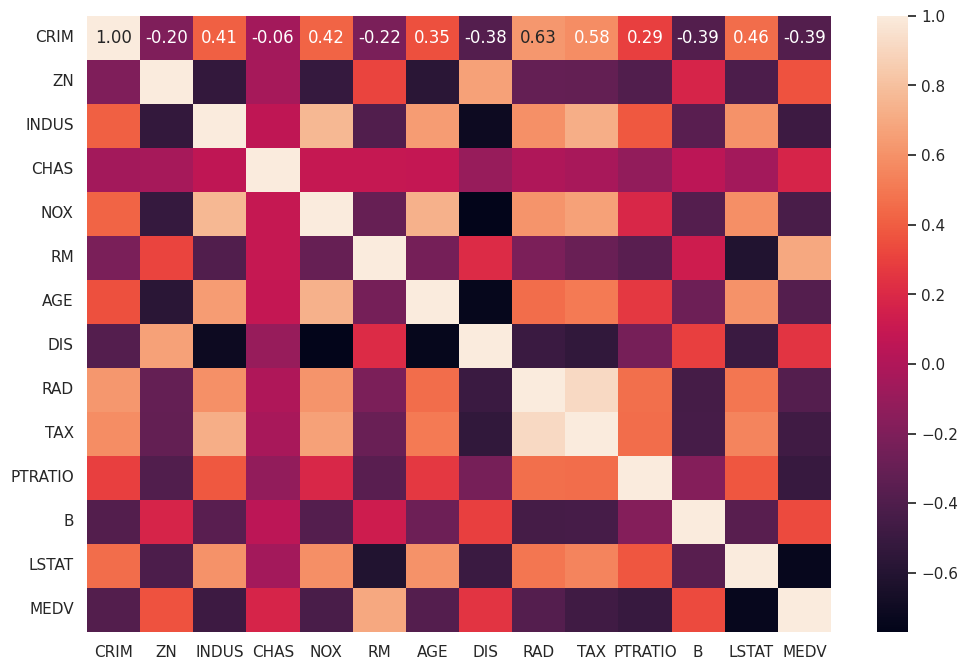

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

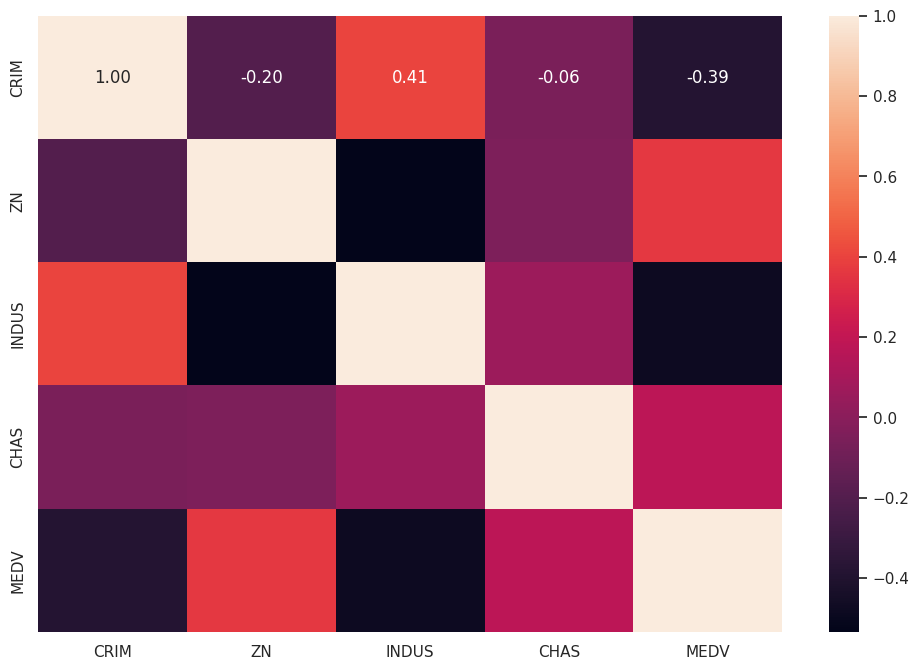

In [108]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f")
plt.show()

In [109]:
import matplotlib as mpl
print(mpl.__version__)

3.8.0


***

# Linear Regression with Scikit-Learn

In [110]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [111]:
X = df['RM'].values.reshape(-1,1)

In [112]:
y = df['MEDV'].values

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()

In [115]:
model.fit(X, y)

LinearRegression()

In [116]:
model.coef_

array([9.10210898])

In [117]:
model.intercept_

-34.67062077643857

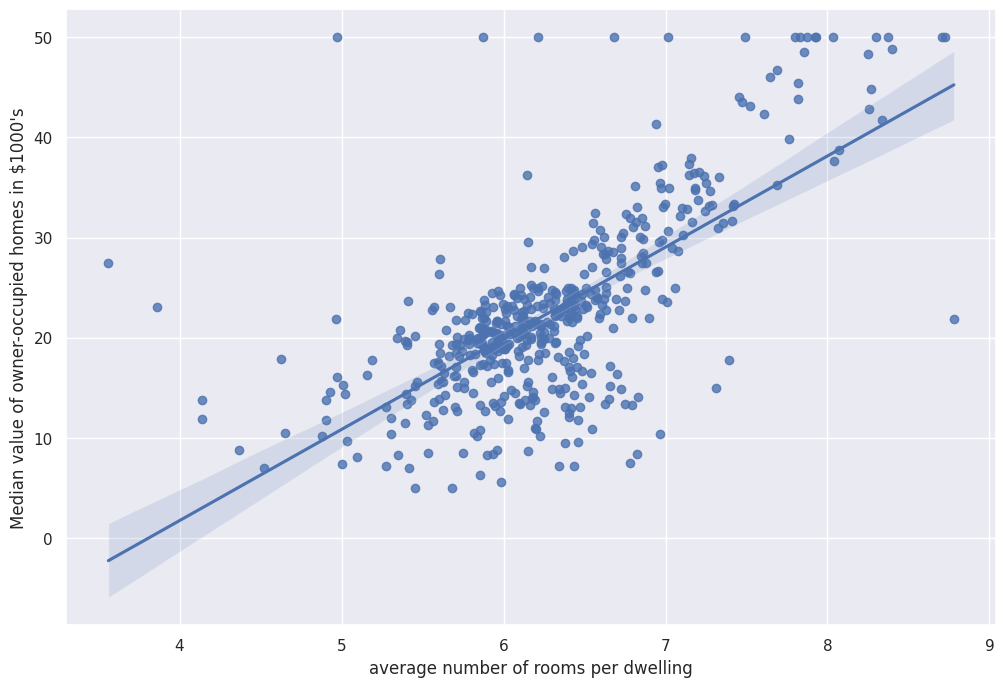

In [118]:
plt.figure(figsize=(12,8));
sns.regplot(x=X, y=y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

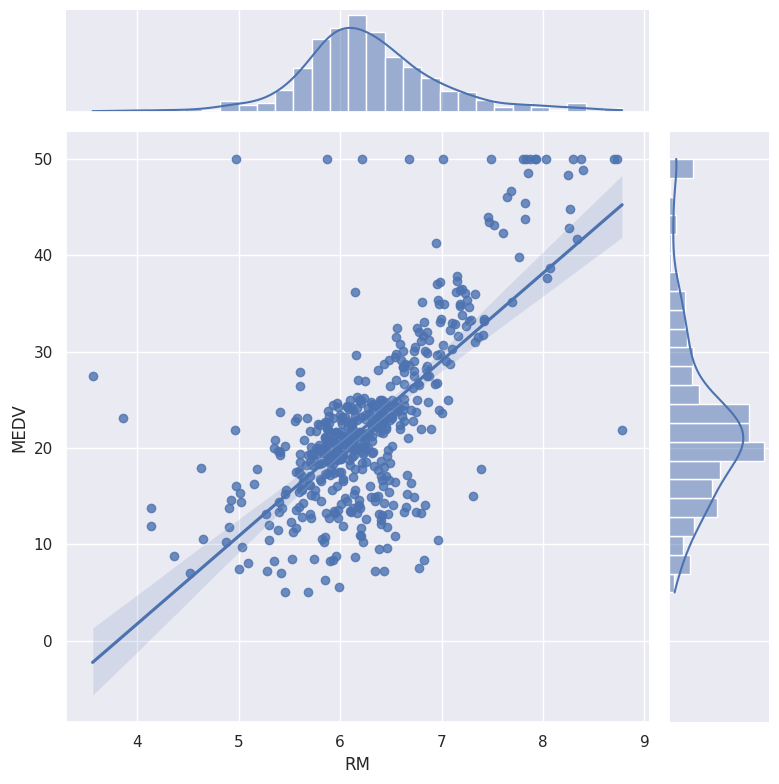

In [119]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [120]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

***

Below is from Jacob T. VanderPlas text, Python Data Science Handbook: Essential Tools for Working with Data

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

***

In [121]:
# Step 1: Selecting a model

# Step 2: Instantiation
ml_2 = LinearRegression()

# Step 3: Arrange data
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

# Step 4: Model fitting
ml_2.fit(X, y)

# Step 5: Predict
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

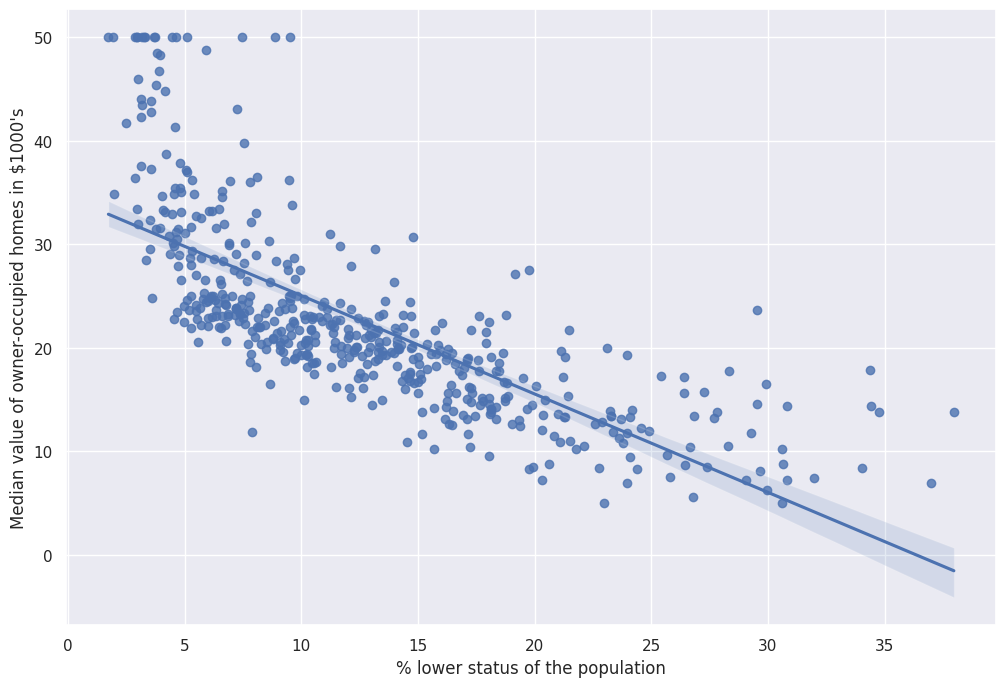

In [122]:
plt.figure(figsize=(12,8));
sns.regplot(x=X, y=y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

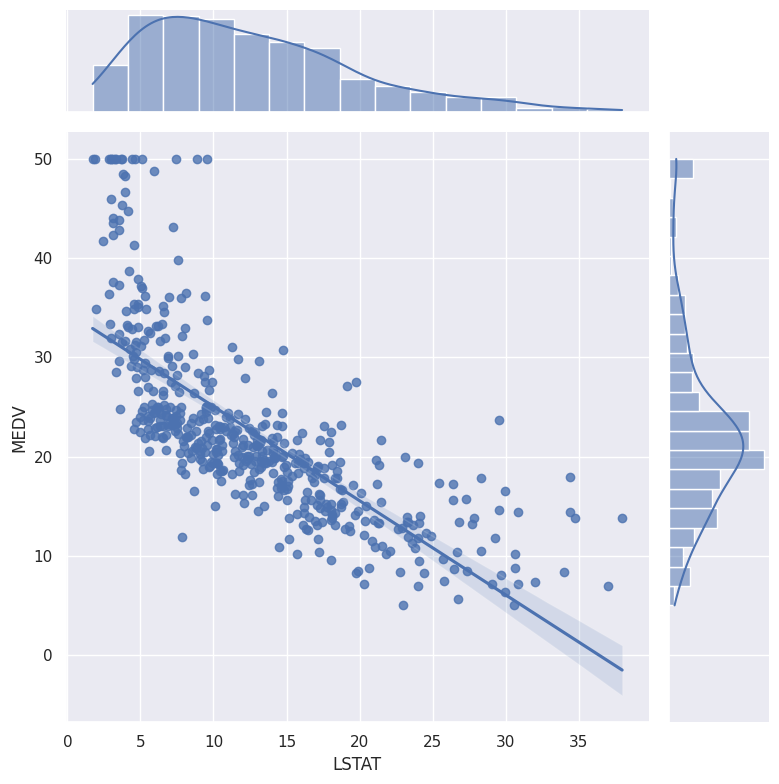

In [123]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();

***

# Robust Regression

Outlier Demo: [http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)

In [124]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


## RANdom SAmple Consensus (RANSAC) Algorithm

link = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [125]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [126]:
from sklearn.linear_model import RANSACRegressor

In [127]:
ransac = RANSACRegressor()

In [128]:
ransac.fit(X, y)

RANSACRegressor()

In [129]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [130]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [131]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

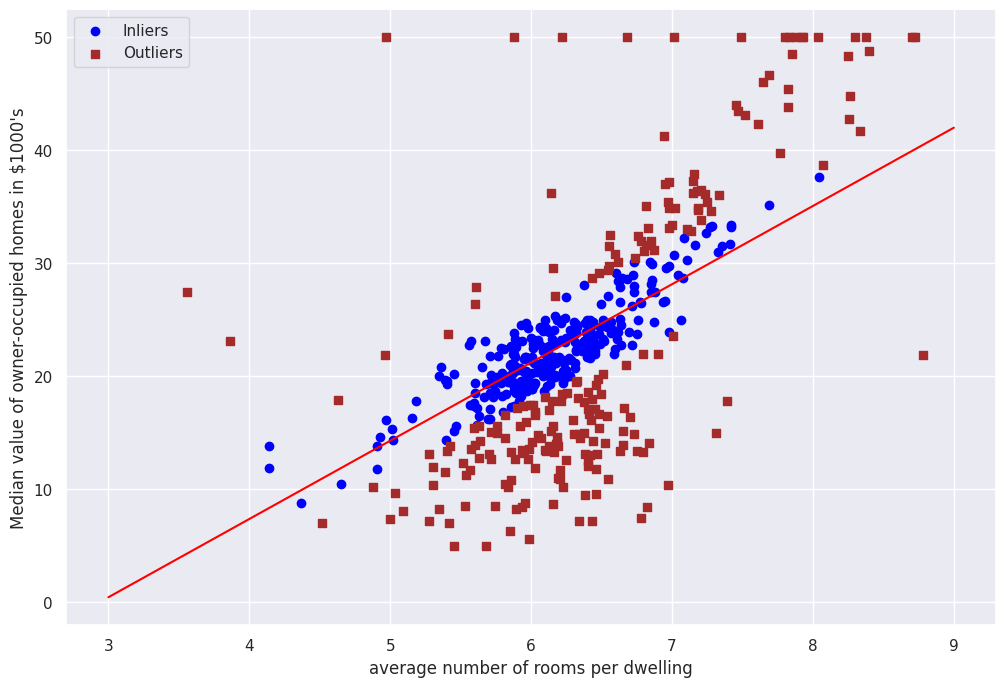

In [132]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [133]:
ransac.estimator_.coef_

array([6.92429361])

In [134]:
ransac.estimator_.intercept_

-20.321344530870004

***

In [135]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

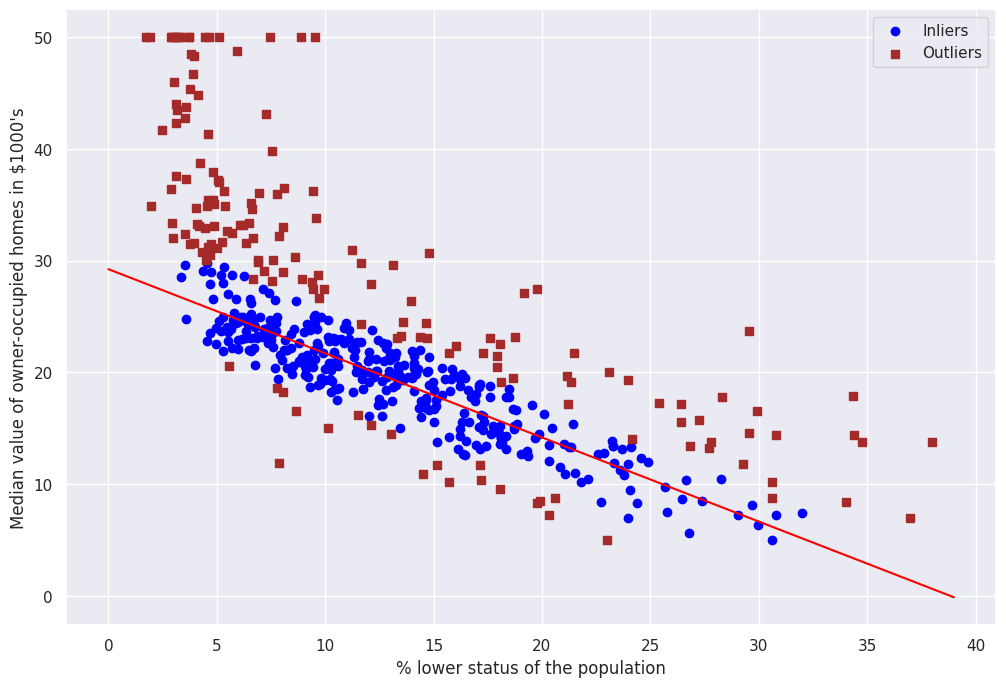

In [136]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

***

# Performance Evaluation of Regression Model

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [139]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [140]:
y = df['MEDV'].values

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
lr = LinearRegression()

In [143]:
lr.fit(X_train, y_train)

LinearRegression()

In [144]:
y_train_pred = lr.predict(X_train)

In [145]:
y_test_pred = lr.predict(X_test)

***

# Method 1: Residual Analysis

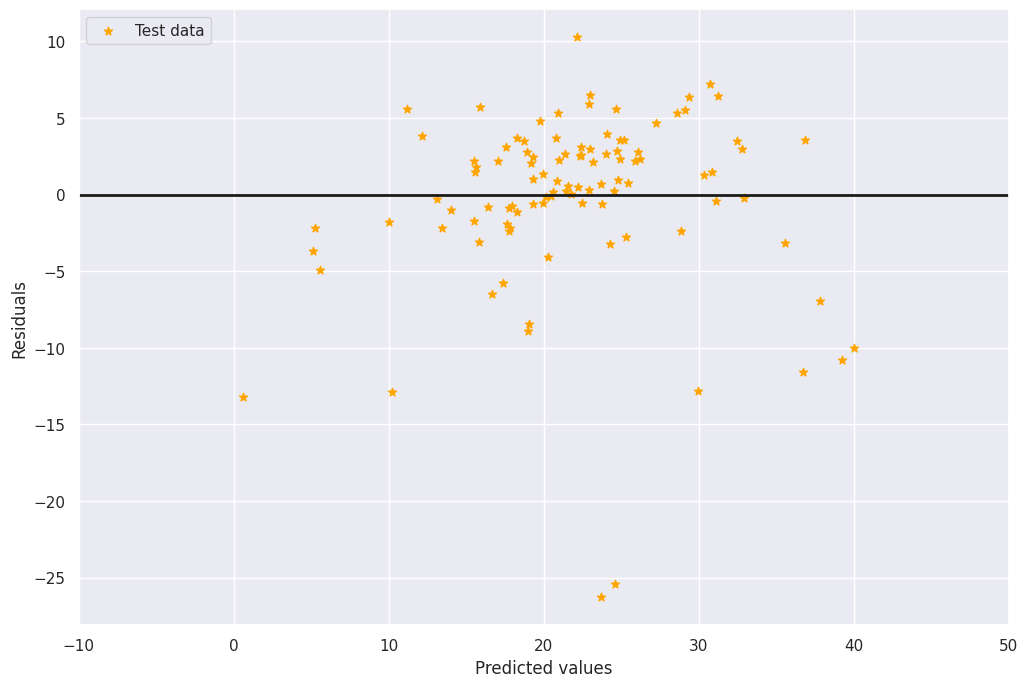

In [146]:
plt.figure(figsize=(12,8))
# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

***

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models

* For tuning parameters via a grid search and cross-validation

In [147]:
from sklearn.metrics import mean_squared_error

In [148]:
mean_squared_error(y_train, y_train_pred)

19.32647020358573

In [149]:
mean_squared_error(y_test, y_test_pred)

33.44897999767653

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [150]:
from sklearn.metrics import r2_score

In [151]:
r2_score(y_train, y_train_pred)

0.7730135569264233

In [152]:
r2_score(y_test, y_test_pred)

0.5892223849182507

***

# What does a Near Perfect Model Looks like?

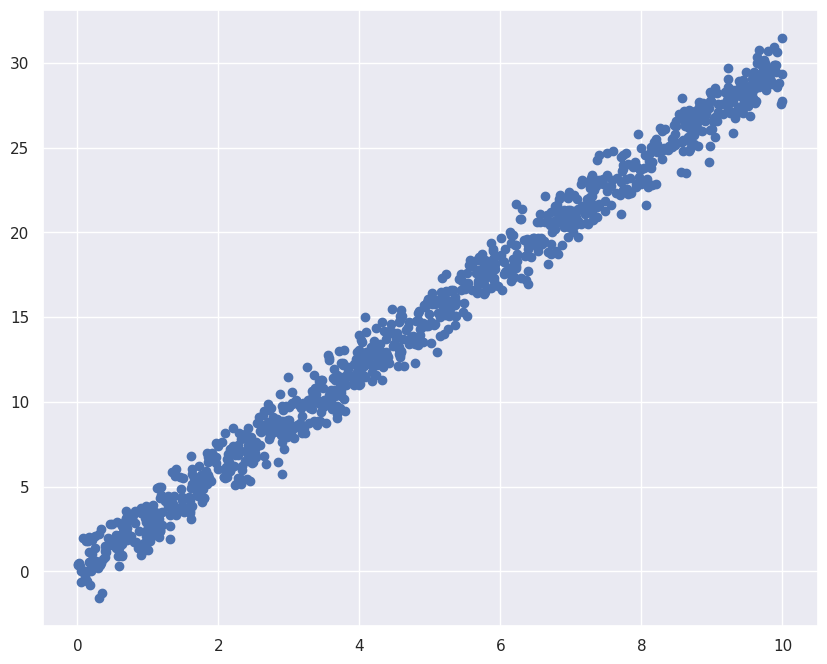

In [153]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [156]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

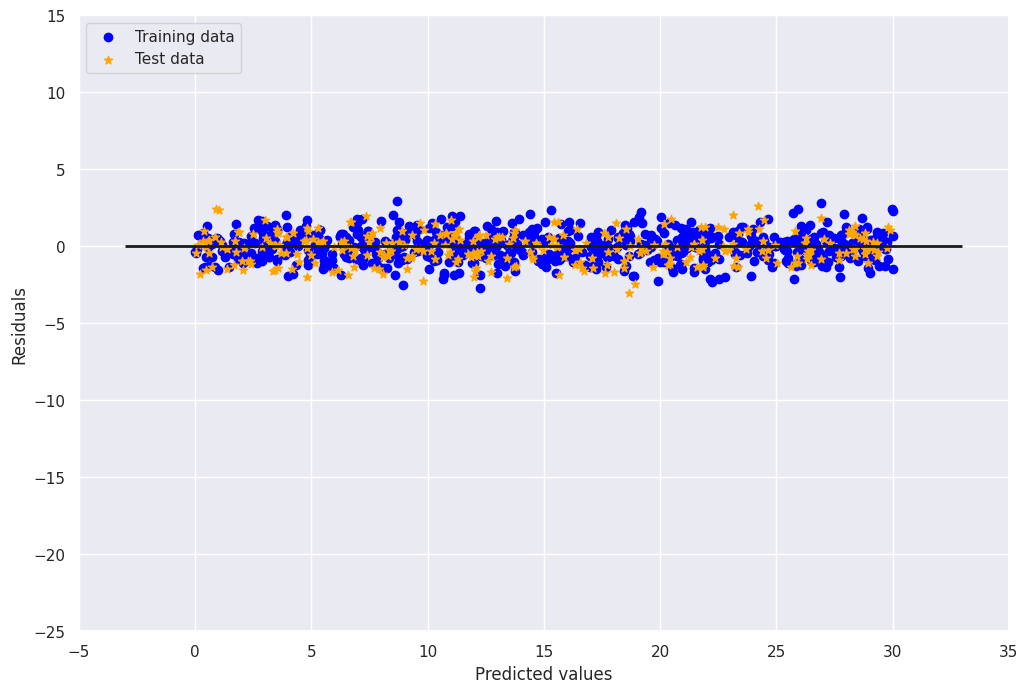

In [157]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [158]:
mean_squared_error(y_train, y_train_pred)

0.8459795175273759

In [159]:
mean_squared_error(y_test, y_test_pred)

0.9283002928480024

# Method 3: Coefficient of Determination, $R^2$

In [160]:
r2_score(y_train, y_train_pred)

0.9889633755927453

In [161]:
r2_score(y_test, y_test_pred)

0.9880099289206127

***

# Yet to be covered

* Mean Absolute Error
* Stratified Shuffle Split
* Feature Engineering. E.g., Combining Features, Designing derivative features
* Data preparation. E.g., missing values etc.
* Categorical features
* Transform data / feature scaling. Scikit-learn Pipeline
* Fine Tuning. E.g., Grid Search, Randomized Search
* Ensemble Methods


***